In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)


import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('full_final_nhl_stats.csv')

In [3]:
len(df)

545

In [4]:
df.drop(axis=1, columns=['Unnamed: 0'], inplace=True)

In [5]:
df.columns

Index(['teamID_seasonID', 'evGGARatio', 'faceOffWinPercentage', 'faceOffsLost',
       'faceOffsTaken', 'faceOffsWon', 'gamesPlayed_x', 'goalsAgainstPerGame',
       'goalsPerGame', 'losses_x', 'ot', 'penaltyKillPercentage',
       'powerPlayGoals', 'powerPlayGoalsAgainst', 'powerPlayOpportunities',
       'powerPlayPercentage', 'ptPctg', 'pts', 'savePctg', 'shootingPctg_x',
       'shotsAllowed', 'shotsPerGame', 'winLeadFirstPer', 'winLeadSecondPer',
       'winOppScoreFirst', 'winOutshootOpp', 'winOutshotByOpp',
       'winScoreFirst', 'wins_x', 'blockedShots', 'faceoffWinPctg', 'faceoffs',
       'faceoffsLost', 'faceoffsWon', 'gamesPlayed_y', 'giveaways', 'goalsFor',
       'hits', 'losses_y', 'missedShots', 'otLosses', 'points',
       'shootingPctg_y', 'shotsFor', 'takeaways', 'teamAbbrev', 'teamFullName',
       'ties', 'wins_y'],
      dtype='object')

In [6]:
df.head()

,teamID_seasonID,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,gamesPlayed_y,giveaways,goalsFor,hits,losses_y,missedShots,otLosses,points,shootingPctg_y,shotsFor,takeaways,teamAbbrev,teamFullName,ties,wins_y
0,1_19992000,0.9286,49.3,2632.0,5195.0,2563.0,82,2.476,3.061,24,5,87.5,55.0,39.0,274.0,20.1,62.8,103,0.903,9.2,25.6220,33.1341,0.700,0.882,0.459,0.587,0.471,0.622,45,877,0.4933,5195,2632,2563,82,984,251,2146,24,1262,5,103,0.0923,2717,1258,NJD,New Jersey Devils,8,45
1,1_20002001,1.1969,49.4,2662.0,5259.0,2597.0,82,2.378,3.598,19,3,84.6,71.0,49.0,310.0,22.9,67.7,111,0.904,11.4,24.6829,31.5854,0.839,0.921,0.421,0.583,0.684,0.727,48,856,0.4938,5259,2662,2597,82,1011,295,2027,19,1198,3,111,0.1138,2590,1015,NJD,New Jersey Devils,12,48
2,1_20012002,1.1969,49.5,2603.0,5156.0,2553.0,82,2.280,2.500,28,4,83.7,44.0,43.0,261.0,16.9,57.9,95,0.902,8.4,23.1707,29.8171,0.750,0.774,0.275,0.452,0.632,0.714,41,920,0.4951,5156,2603,2553,82,888,205,1983,28,1155,4,95,0.0838,2445,898,NJD,New Jersey Devils,9,41
3,1_20022003,1.3684,50.7,2467.0,5002.0,2535.0,82,2.024,2.634,20,6,87.8,36.0,32.0,303.0,11.9,65.9,108,0.914,8.3,23.5732,31.7195,0.821,0.846,0.353,0.523,0.692,0.708,46,303,0.5067,5002,2467,2535,82,270,216,487,20,371,6,108,0.0830,2601,214,NJD,New Jersey Devils,10,46
4,1_20032004,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,2,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,8.8,24.4024,29.6707,0.821,0.842,0.176,0.559,0.500,0.771,43,834,0.4920,4916,2497,2419,82,1073,213,928,25,974,2,100,0.0875,2433,619,NJD,New Jersey Devils,12,43


In [7]:
df.describe()

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,gamesPlayed_y,giveaways,goalsFor,hits,losses_y,missedShots,otLosses,points,shootingPctg_y,shotsFor,takeaways,ties,wins_y
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,1.021006,50.029541,2428.900917,4861.741284,2432.840367,80.190826,2.739596,2.756552,30.511927,8.062385,82.171376,54.612844,54.044037,306.214679,17.958899,55.288440,88.653211,0.907017,9.315596,29.488509,29.622883,0.728070,0.835512,0.311512,0.490147,0.481079,0.661259,38.974312,1029.416514,0.500257,4861.741284,2428.900917,2432.840367,80.190826,727.436697,221.227523,1673.908257,30.511927,908.016514,8.062385,88.653211,0.093098,2376.462385,543.774312,2.642202,38.974312
std,0.184834,2.014987,290.212000,554.315348,297.999559,7.638447,0.338223,0.322992,7.552046,3.516735,2.946207,14.758305,14.653532,74.129952,2.979711,8.930014,16.573891,0.009156,0.941113,2.453878,2.188662,0.105955,0.081933,0.099967,0.115868,0.115760,0.102717,8.548267,245.363755,0.020138,554.315348,290.212000,297.999559,7.638447,234.596470,34.250746,439.109655,7.552046,193.518462,3.516735,16.573891,0.009401,292.125085,159.665685,4.744817,8.548267
min,0.571400,44.200000,1241.000000,2719.000000,1267.000000,48.000000,1.890000,1.829000,7.000000,0.000000,72.700000,18.000000,18.000000,122.000000,9.600000,29.300000,36.000000,0.876000,6.900000,22.122000,23.731700,0.333000,0.500000,0.060000,0.158000,0.158000,0.290000,15.000000,170.000000,0.441500,2719.000000,1241.000000,1267.000000,48.000000,169.000000,109.000000,382.000000,7.000000,233.000000,0.000000,36.000000,0.068900,1244.000000,86.000000,0.000000,15.000000
25%,0.896800,48.600000,2346.000000,4724.000000,2334.000000,82.000000,2.488000,2.542000,26.000000,6.000000,80.400000,45.000000,44.000000,252.000000,15.900000,48.800000,78.000000,0.901000,8.700000,27.902400,28.085400,0.667000,0.786000,0.238000,0.407000,0.407000,0.595000,33.000000,928.000000,0.486300,4724.000000,2346.000000,2334.000000,82.000000,578.000000,206.000000,1421.000000,26.000000,870.000000,6.000000,78.000000,0.087200,2286.000000,457.000000,0.000000,33.000000
50%,1.013300,50.100000,2462.000000,4909.000000,2455.000000,82.000000,2.708000,2.732000,30.000000,8.000000,82.200000,53.000000,52.000000,301.000000,17.800000,56.700000,92.000000,0.907000,9.300000,29.487800,29.597600,0.741000,0.846000,0.311000,0.500000,0.480000,0.674000,40.000000,1071.000000,0.500700,4909.000000,2462.000000,2455.000000,82.000000,734.000000,223.000000,1714.000000,30.000000,944.000000,8.000000,92.000000,0.093000,2417.000000,552.000000,0.000000,40.000000
75%,1.142900,51.300000,2586.000000,5167.000000,2602.000000,82.000000,2.963000,2.963000,35.000000,11.000000,84.500000,63.000000,62.000000,356.000000,19.700000,61.600000,101.000000,0.914000,9.900000,31.109800,31.085400,0.806000,0.889000,0.387000,0.576000,0.556000,0.737000,45.000000,1200.000000,0.513200,5167.000000,2586.000000,2602.000000,82.000000,867.000000,243.000000,1949.000000,35.000000,1016.000000,11.000000,101.000000,0.098800,2542.000000,639.000000,5.000000,45.000000
max,1.575200,56.400000,2969.000000,5651.000000,3100.000000,82.000000,3.780000,3.890000,56.000000,18.000000,

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 49 columns):
teamID_seasonID           545 non-null object
evGGARatio                545 non-null float64
faceOffWinPercentage      545 non-null float64
faceOffsLost              545 non-null float64
faceOffsTaken             545 non-null float64
faceOffsWon               545 non-null float64
gamesPlayed_x             545 non-null int64
goalsAgainstPerGame       545 non-null float64
goalsPerGame              545 non-null float64
losses_x                  545 non-null int64
ot                        545 non-null int64
penaltyKillPercentage     545 non-null float64
powerPlayGoals            545 non-null float64
powerPlayGoalsAgainst     545 non-null float64
powerPlayOpportunities    545 non-null float64
powerPlayPercentage       545 non-null float64
ptPctg                    545 non-null float64
pts                       545 non-null int64
savePctg                  545 non-null float64
shootingPct

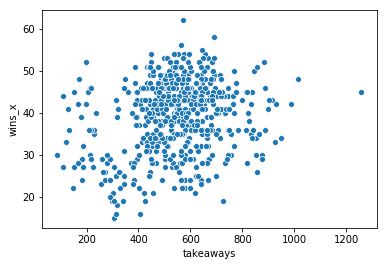

In [11]:
ax = sns.scatterplot(x='takeaways', y='wins_x', data=df)

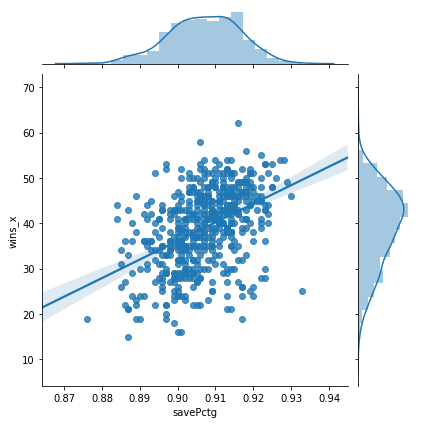

In [27]:
sns.jointplot(x="savePctg", y="wins_x", data=df, kind="reg")

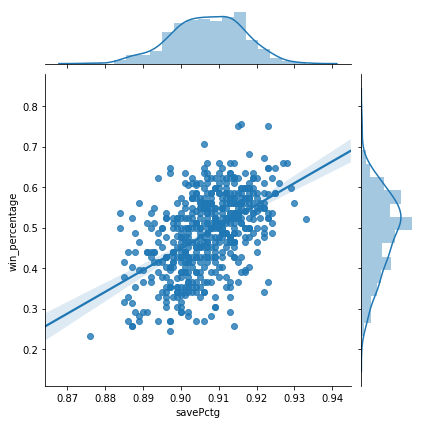

In [28]:
sns.jointplot(x="savePctg", y="win_percentage", data=df, kind="reg")

In [33]:
url = 'https://statsapi.web.nhl.com/api/v1/teams/11/stats'
response = requests.get(url)
data = response.json()

In [35]:
def get_regseason_defense_stats(list_of_seasons):
    # empty list to hold our team shot stats 
    team_defense_stats = []
    # iterate through the list of seasons
    for seasonID in list_of_seasons:
        season_url = f"https://api.nhle.com/stats/rest/team?isAggregate=false&reportType=basic&isGame=false&reportName=realtime&sort=[{{%22property%22:%22hits%22,%22direction%22:%22DESC%22}}]&cayenneExp=leagueId=133%20and%20gameTypeId=2%20and%20seasonId%3E={seasonID}%20and%20seasonId%3C={seasonID}"
        response = requests.get(season_url)
        data = response.json()['data']
        for team_defense in data:
            team_defense_stats.append(team_defense)
    return team_defense_stats

In [42]:
season_ids = [
'19992000',
 '20002001',
 '20012002',
 '20022003',
 '20032004',
 '20052006',
 '20062007',
 '20072008',
 '20082009',
 '20092010',
 '20102011',
 '20112012',
 '20122013',
 '20132014',
 '20142015',
 '20152016',
 '20162017',
 '20172018',
 '20182019']

In [ ]:
sns.pairplot(df, diag_kind="kde", height=2.5)

In [11]:
df.drop(columns=['wins_y','shootingPctg_y','ot', 'losses_y','faceoffsLost','faceoffsWon','faceoffs','faceoffWinPctg'], axis=1, inplace=True)

In [12]:
len(df.columns)

41

In [14]:
df.columns

Index(['teamID_seasonID', 'evGGARatio', 'faceOffWinPercentage', 'faceOffsLost',
       'faceOffsTaken', 'faceOffsWon', 'gamesPlayed_x', 'goalsAgainstPerGame',
       'goalsPerGame', 'losses_x', 'penaltyKillPercentage', 'powerPlayGoals',
       'powerPlayGoalsAgainst', 'powerPlayOpportunities',
       'powerPlayPercentage', 'ptPctg', 'pts', 'savePctg', 'shootingPctg_x',
       'shotsAllowed', 'shotsPerGame', 'winLeadFirstPer', 'winLeadSecondPer',
       'winOppScoreFirst', 'winOutshootOpp', 'winOutshotByOpp',
       'winScoreFirst', 'wins_x', 'blockedShots', 'gamesPlayed_y', 'giveaways',
       'goalsFor', 'hits', 'missedShots', 'otLosses', 'points', 'shotsFor',
       'takeaways', 'teamAbbrev', 'teamFullName', 'ties'],
      dtype='object')

In [17]:
df.set_index('teamID_seasonID', inplace=True)

In [21]:
df.drop(axis=1, columns=['gamesPlayed_y'], inplace=True)

In [23]:
df.shape

(545, 39)

In [24]:
df['win_percentage']=df['wins_x']/df['gamesPlayed_x']

In [25]:
df.head()

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,giveaways,goalsFor,hits,missedShots,otLosses,points,shotsFor,takeaways,teamAbbrev,teamFullName,ties,win_percentage
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_19992000,0.9286,49.3,2632.0,5195.0,2563.0,82,2.476,3.061,24,87.5,55.0,39.0,274.0,20.1,62.8,103,0.903,9.2,25.6220,33.1341,0.700,0.882,0.459,0.587,0.471,0.622,45,877,984,251,2146,1262,5,103,2717,1258,NJD,New Jersey Devils,8,0.548780
1_20002001,1.1969,49.4,2662.0,5259.0,2597.0,82,2.378,3.598,19,84.6,71.0,49.0,310.0,22.9,67.7,111,0.904,11.4,24.6829,31.5854,0.839,0.921,0.421,0.583,0.684,0.727,48,856,1011,295,2027,1198,3,111,2590,1015,NJD,New Jersey Devils,12,0.585366
1_20012002,1.1969,49.5,2603.0,5156.0,2553.0,82,2.280,2.500,28,83.7,44.0,43.0,261.0,16.9,57.9,95,0.902,8.4,23.1707,29.8171,0.750,0.774,0.275,0.452,0.632,0.714,41,920,888,205,1983,1155,4,95,2445,898,NJD,New Jersey Devils,9,0.500000
1_20022003,1.3684,50.7,2467.0,5002.0,2535.0,82,2.024,2.634,20,87.8,36.0,32.0,303.0,11.9,65.9,108,0.914,8.3,23.5732,31.7195,0.821,0.846,0.353,0.523,0.692,0.708,46,303,270,216,487,371,6,108,2601,214,NJD,New Jersey Devils,10,0.560976
1_20032004,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,8.8,24.4024,29.6707,0.821,0.842,0.176,0.559,0.500,0.771,43,834,1073,213,928,974,2,100,2433,619,NJD,New Jersey Devils,12,0.524390


In [42]:
df[['shotsFor', 'shotsPerGame','shotsAllowed']].head()

,shotsFor,shotsPerGame,shotsAllowed
teamID_seasonID,,,
1_19992000,2717,33.1341,25.6220
1_20002001,2590,31.5854,24.6829
1_20012002,2445,29.8171,23.1707
1_20022003,2601,31.7195,23.5732
1_20032004,2433,29.6707,24.4024


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 1_19992000 to 54_20182019
Data columns (total 40 columns):
evGGARatio                545 non-null float64
faceOffWinPercentage      545 non-null float64
faceOffsLost              545 non-null float64
faceOffsTaken             545 non-null float64
faceOffsWon               545 non-null float64
gamesPlayed_x             545 non-null int64
goalsAgainstPerGame       545 non-null float64
goalsPerGame              545 non-null float64
losses_x                  545 non-null int64
penaltyKillPercentage     545 non-null float64
powerPlayGoals            545 non-null float64
powerPlayGoalsAgainst     545 non-null float64
powerPlayOpportunities    545 non-null float64
powerPlayPercentage       545 non-null float64
ptPctg                    545 non-null float64
pts                       545 non-null int64
savePctg                  545 non-null float64
shootingPctg_x            545 non-null float64
shotsAllowed              545 non-null floa

In [43]:
list(df.columns)

['evGGARatio',
 'faceOffWinPercentage',
 'faceOffsLost',
 'faceOffsTaken',
 'faceOffsWon',
 'gamesPlayed_x',
 'goalsAgainstPerGame',
 'goalsPerGame',
 'losses_x',
 'penaltyKillPercentage',
 'powerPlayGoals',
 'powerPlayGoalsAgainst',
 'powerPlayOpportunities',
 'powerPlayPercentage',
 'ptPctg',
 'pts',
 'savePctg',
 'shootingPctg_x',
 'shotsAllowed',
 'shotsPerGame',
 'winLeadFirstPer',
 'winLeadSecondPer',
 'winOppScoreFirst',
 'winOutshootOpp',
 'winOutshotByOpp',
 'winScoreFirst',
 'wins_x',
 'blockedShots',
 'giveaways',
 'goalsFor',
 'hits',
 'missedShots',
 'otLosses',
 'points',
 'shotsFor',
 'takeaways',
 'teamAbbrev',
 'teamFullName',
 'ties',
 'win_percentage']

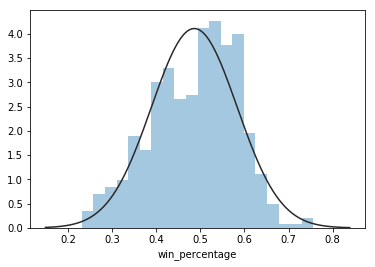

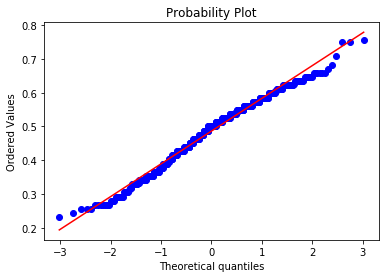

In [26]:
#histogram and normal probability plot
sns.distplot(df['win_percentage'], fit=norm, bins=20, kde=False);
fig = plt.figure()
res = stats.probplot(df['win_percentage'], plot=plt)

In [29]:
df.win_percentage.describe()

count    545.000000
mean       0.486376
std        0.097166
min        0.231707
25%        0.426829
50%        0.500000
75%        0.560976
max        0.756098
Name: win_percentage, dtype: float64

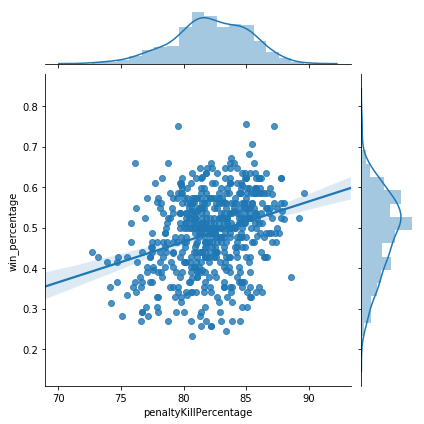

In [30]:
sns.jointplot(x="penaltyKillPercentage", y="win_percentage", data=df, kind="reg")

In [32]:
df.to_csv('revised_full_stats_df.csv')

In [52]:
features = list(df.columns.values)

In [57]:
del features[-3]

In [58]:
features

['evGGARatio',
 'faceOffWinPercentage',
 'faceOffsLost',
 'faceOffsTaken',
 'faceOffsWon',
 'gamesPlayed_x',
 'goalsAgainstPerGame',
 'goalsPerGame',
 'losses_x',
 'penaltyKillPercentage',
 'powerPlayGoals',
 'powerPlayGoalsAgainst',
 'powerPlayOpportunities',
 'powerPlayPercentage',
 'ptPctg',
 'pts',
 'savePctg',
 'shootingPctg_x',
 'shotsAllowed',
 'shotsPerGame',
 'winLeadFirstPer',
 'winLeadSecondPer',
 'winOppScoreFirst',
 'winOutshootOpp',
 'winOutshotByOpp',
 'winScoreFirst',
 'wins_x',
 'blockedShots',
 'giveaways',
 'goalsFor',
 'hits',
 'missedShots',
 'otLosses',
 'points',
 'shotsFor',
 'takeaways',
 'ties',
 'win_percentage']

In [59]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

In [60]:
row_groups

[['evGGARatio', 'faceOffWinPercentage', 'faceOffsLost', 'faceOffsTaken'],
 ['faceOffsWon', 'gamesPlayed_x', 'goalsAgainstPerGame', 'goalsPerGame'],
 ['losses_x',
  'penaltyKillPercentage',
  'powerPlayGoals',
  'powerPlayGoalsAgainst'],
 ['powerPlayOpportunities', 'powerPlayPercentage', 'ptPctg', 'pts'],
 ['savePctg', 'shootingPctg_x', 'shotsAllowed', 'shotsPerGame'],
 ['winLeadFirstPer', 'winLeadSecondPer', 'winOppScoreFirst', 'winOutshootOpp'],
 ['winOutshotByOpp', 'winScoreFirst', 'wins_x', 'blockedShots'],
 ['giveaways', 'goalsFor', 'hits', 'missedShots'],
 ['otLosses', 'points', 'shotsFor', 'takeaways'],
 ['ties', 'win_percentage']]

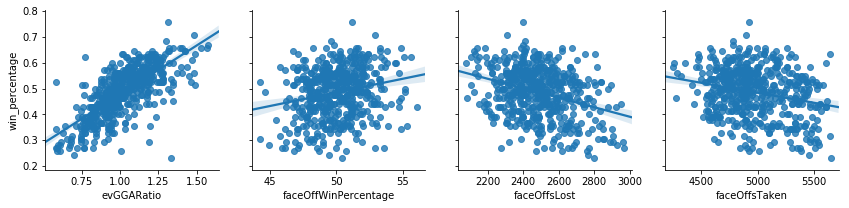

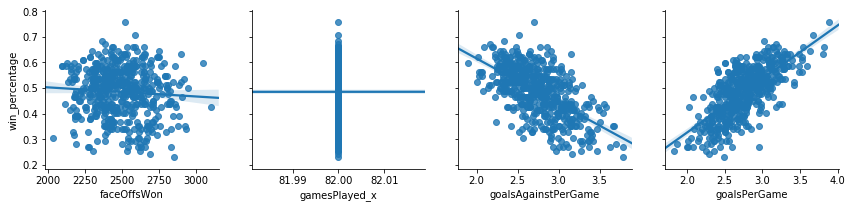

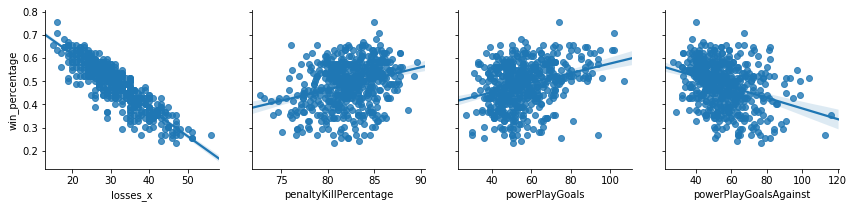

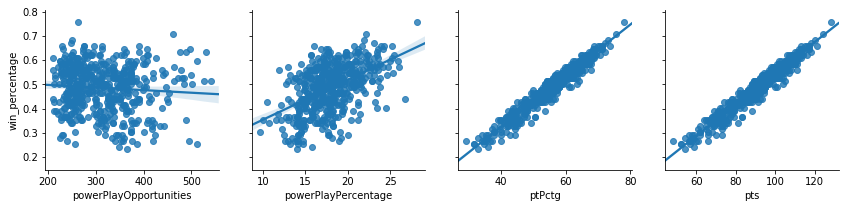

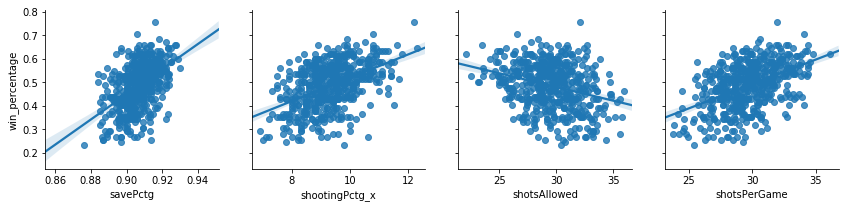

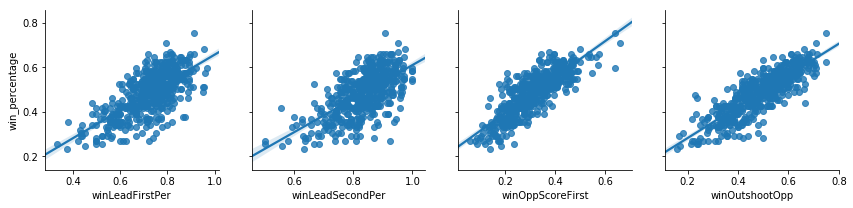

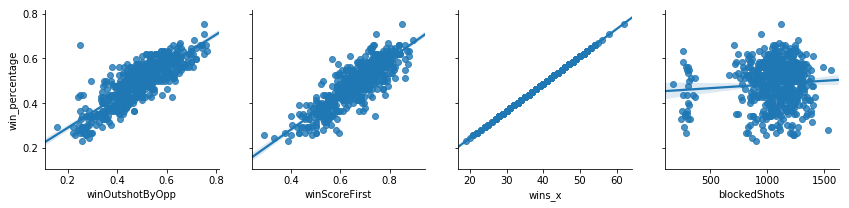

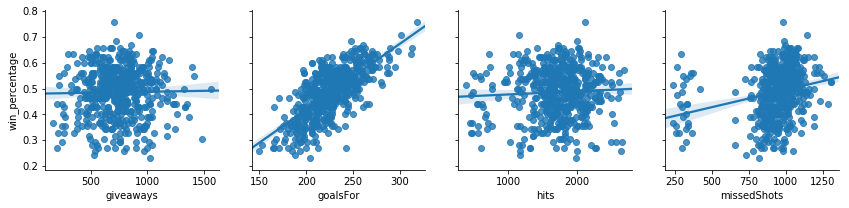

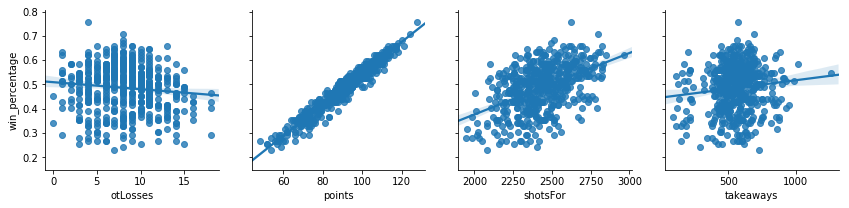

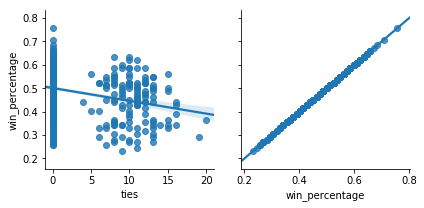

In [86]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['win_percentage'],x_vars=i, kind="reg", height=3)

In [78]:
ixl = list(df.index)

In [82]:
lockout = [i for i in ixl if '20122013' in i]

In [84]:
df.drop(index=lockout, axis=0, inplace=True)

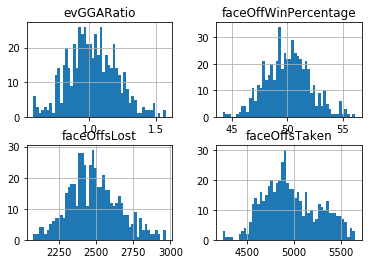

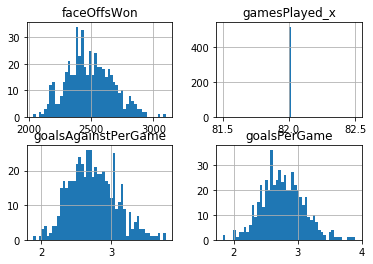

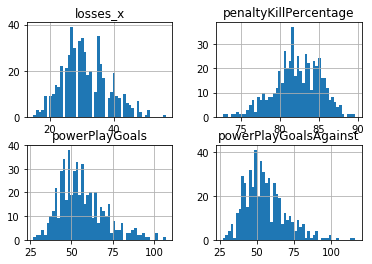

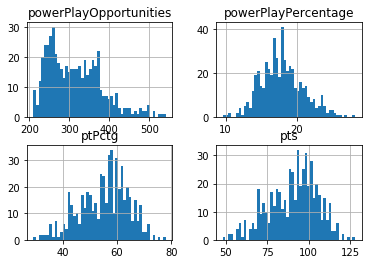

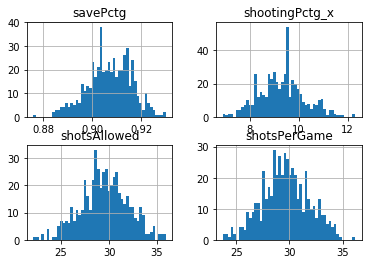

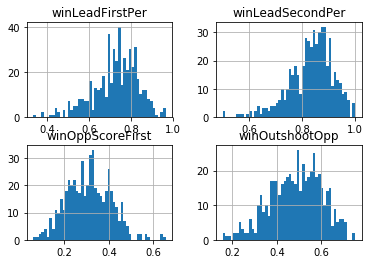

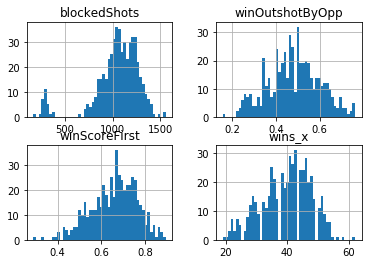

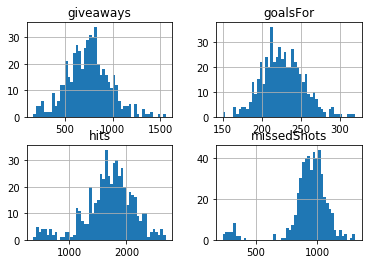

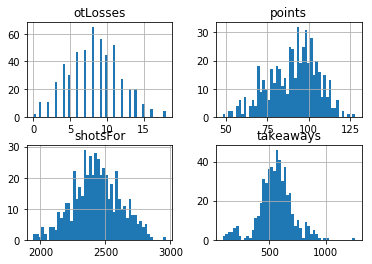

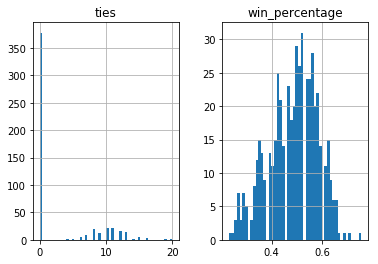

In [98]:
for i in row_groups:
    pp = df.hist(i, bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e34b630>]],
      dtype=object)

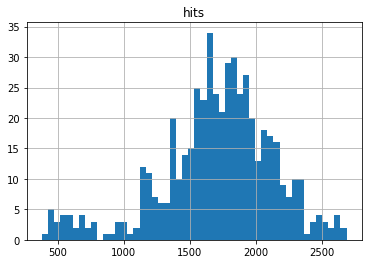

In [94]:
df.hist('hits', bins=50)

In [97]:
df[df['hits']<1000]

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,giveaways,goalsFor,hits,missedShots,otLosses,points,shotsFor,takeaways,teamAbbrev,teamFullName,ties,win_percentage
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_20022003,1.3684,50.7,2467.0,5002.0,2535.0,82,2.024,2.634,20,87.8,36.0,32.0,303.0,11.9,65.9,108,0.914,8.3,23.5732,31.7195,0.821,0.846,0.353,0.523,0.692,0.708,46,303,270,216,487,371,6,108,2601,214,NJD,New Jersey Devils,10,0.560976
1_20032004,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,8.8,24.4024,29.6707,0.821,0.842,0.176,0.559,0.500,0.771,43,834,1073,213,928,974,2,100,2433,619,NJD,New Jersey Devils,12,0.524390
2_20022003,0.9929,51.1,2742.0,5606.0,2864.0,82,2.817,2.732,34,83.4,58.0,67.0,384.0,15.1,50.6,83,0.900,9.2,28.2683,29.5976,0.654,0.824,0.311,0.447,0.400,0.568,35,366,270,224,626,297,2,83,2427,227,NYI,New York Islanders,11,0.426829
3_20022003,1.0543,53.3,2490.0,5334.0,2844.0,82,2.817,2.561,36,81.1,55.0,73.0,339.0,16.2,47.6,78,0.905,8.5,29.5854,30.0610,0.600,0.870,0.300,0.350,0.429,0.476,32,312,274,210,657,301,4,78,2465,187,NYR,New York Rangers,10,0.390244
4_20022003,1.4490,52.2,2419.0,5065.0,2646.0,82,2.024,2.573,20,85.2,47.0,50.0,328.0,14.3,65.2,107,0.918,8.3,24.6220,30.9390,0.864,0.882,0.372,0.589,0.478,0.744,45,310,399,211,506,351,4,107,2537,204,PHI,Philadelphia Flyers,13,0.548780
5_20022003,0.6279,49.5,2766.0,5472.0,2706.0,82,3.110,2.305,44,83.5,66.0,58.0,360.0,18.3,39.6,65,0.899,9.1,30.9146,25.3537,0.600,0.870,0.190,0.400,0.305,0.475,27,320,211,189,470,255,5,65,2079,109,PIT,Pittsburgh Penguins,6,0.329268
6_20022003,1.0667,49.6,2755.0,5464.0,2709.0,82,2.890,2.988,31,82.6,59.0,65.0,325.0,18.1,53.0,87,0.898,9.3,28.3171,32.1463,0.750,0.839,0.214,0.439,0.435,0.675,36,260,202,245,538,331,4,87,2636,133,BOS,Boston Bruins,11,0.439024
7_20022003,0.8417,50.1,2662.0,5336.0,2674.0,82,2.671,2.317,37,85.4,51.0,53.0,354.0,14.4,43.9,72,0.905,8.1,28.0122,28.5976,0.542,0.593,0.205,0.324,0.357,0.474,27,303,352,190,554,366,8,72,2345,150,BUF,Buffalo Sabres,10,0.329268
8_20022003,0.9671,52.7,2433.0,5141.0,2708.0,82,2.854,2.512,35,81.7,44.0,58.0,315.0,14.0,47.0,77,0.913,9.7,32.6585,25.8415,0.533,0.658,0.220,0.375,0.344,0.512,30,292,385,206,437,336,9,77,2119,212,MTL,Montréal Canadiens,8,0.365854


In [88]:
df.evGGARatio.describe()

count    516.000000
mean       1.020953
std        0.183958
min        0.578000
25%        0.896750
50%        1.013300
75%        1.146225
max        1.575200
Name: evGGARatio, dtype: float64

In [89]:
df.goalsPerGame.describe()

count    516.000000
mean       2.762041
std        0.324503
min        1.829000
25%        2.549000
50%        2.744000
75%        2.966250
max        3.890000
Name: goalsPerGame, dtype: float64

In [92]:
df.head(20)

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,giveaways,goalsFor,hits,missedShots,otLosses,points,shotsFor,takeaways,teamAbbrev,teamFullName,ties,win_percentage
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_19992000,0.9286,49.3,2632.0,5195.0,2563.0,82,2.476,3.061,24,87.5,55.0,39.0,274.0,20.1,62.8,103,0.903,9.2,25.6220,33.1341,0.700,0.882,0.459,0.587,0.471,0.622,45,877,984,251,2146,1262,5,103,2717,1258,NJD,New Jersey Devils,8,0.548780
1_20002001,1.1969,49.4,2662.0,5259.0,2597.0,82,2.378,3.598,19,84.6,71.0,49.0,310.0,22.9,67.7,111,0.904,11.4,24.6829,31.5854,0.839,0.921,0.421,0.583,0.684,0.727,48,856,1011,295,2027,1198,3,111,2590,1015,NJD,New Jersey Devils,12,0.585366
1_20012002,1.1969,49.5,2603.0,5156.0,2553.0,82,2.280,2.500,28,83.7,44.0,43.0,261.0,16.9,57.9,95,0.902,8.4,23.1707,29.8171,0.750,0.774,0.275,0.452,0.632,0.714,41,920,888,205,1983,1155,4,95,2445,898,NJD,New Jersey Devils,9,0.500000
1_20022003,1.3684,50.7,2467.0,5002.0,2535.0,82,2.024,2.634,20,87.8,36.0,32.0,303.0,11.9,65.9,108,0.914,8.3,23.5732,31.7195,0.821,0.846,0.353,0.523,0.692,0.708,46,303,270,216,487,371,6,108,2601,214,NJD,New Jersey Devils,10,0.560976
1_20032004,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,8.8,24.4024,29.6707,0.821,0.842,0.176,0.559,0.500,0.771,43,834,1073,213,928,974,2,100,2433,619,NJD,New Jersey Devils,12,0.524390
1_20052006,0.9860,49.5,2369.0,4691.0,2322.0,82,2.744,2.841,27,81.9,78.0,63.0,439.0,17.8,61.6,101,0.906,9.7,29.3049,29.2073,0.844,0.886,0.389,0.543,0.512,0.696,46,989,987,233,1167,1024,9,101,2395,660,NJD,New Jersey Devils,0,0.560976
1_20062007,0.9481,49.0,2218.0,4350.0,2132.0,82,2.354,2.512,24,85.2,65.0,40.0,367.0,17.7,65.2,107,0.917,8.8,28.4390,28.7073,0.783,0.912,0.417,0.711,0.538,0.739,49,1127,854,206,1348,1018,9,107,2354,642,NJD,New Jersey Devils,0,0.597561
1_20072008,1.0246,50.4,2126.0,4286.0,2160.0,82,2.354,2.415,29,82.8,50.0,54.0,320.0,15.6,60.4,99,0.914,8.4,27.5244,28.8049,0.806,0.879,0.405,0.609,0.514,0.725,46,830,515,198,1471,907,7,99,2362,543,NJD,New Jersey Devils,0,0.560976
1_20082009,1.2520,51.3,2243.0,4602.0,2359.0,82,2.524,2.902,27,79.9,58.0,65.0,307.0,18.9,64.6,106,0.914,8.8,29.4512,32.9024,0.794,0.951,0.368,0.694,0.533,0.841,51,970,474,238,1448,928,4,106,2698,431,NJD,New Jersey Devils,0,0.621951


In [100]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)




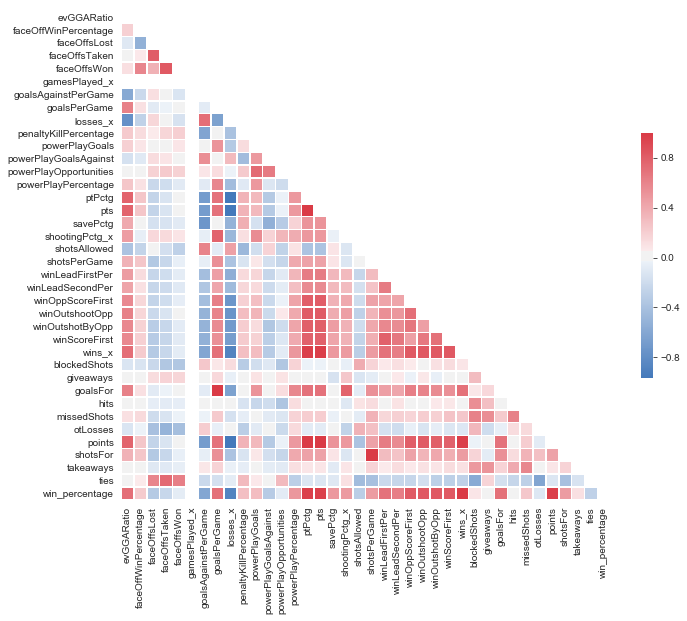

In [101]:
corr = df.corr()
CorrMtx(corr, dropDuplicates = True)

In [ ]:
# building a linear regression model using statsmodel 
from statsmodels.formula.api import ols

lr_model = ols(formula='wins_x~takeaways+faceOffsWon+hits', data=df).fit()

In [105]:
slr_model = sm.OLS(endog=df['win_percentage'], exog=sm.add_constant(df['shotsPerGame'])).fit()

slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         win_percentage   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     148.0
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           4.21e-30
Time:                        13:55:44   Log-Likelihood:                 540.56
No. Observations:                 516   AIC:                            -1077.
Df Residuals:                     514   BIC:                            -1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1297      0.051     -2.559      0.011      -0.229      -0.030
shotsPerGame     0.0207      0.002     12.166      0.000       0.017       0.024
==============================================================================
Omnibus:                        9.700   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.457
Skew:                          -0.246   Prob(JB):                       0.0146
Kurtosis:                       2.611   Cond. No.                         403.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

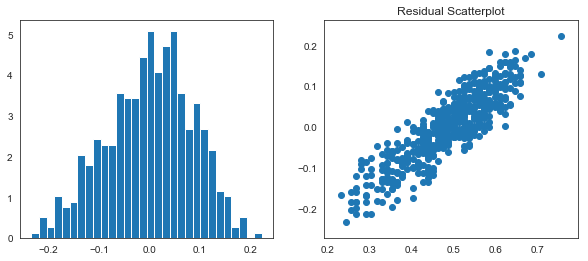

In [106]:
checkresiduals(df, 'win_percentage', slr_model)

In [107]:
df['Original_6']=np.where(((df['teamFullName']=='Boston Bruins') | (df['teamFullName']=='Chicago Blackhawks') |
                    (df['teamFullName']=='Detroit Red Wings') | (df['teamFullName']=='New York Rangers')
                    | (df['teamFullName']=='Toronto Maple Leafs') | (df['teamFullName']=='Montreal Canadiens')),1,0)
